In [28]:
%matplotlib inline
import matplotlib.pyplot as plt       # Necessary imports
import numpy as np
from scipy.optimize import curve_fit
densityPb=11.342

def exponential(x,A,l):
    return A*np.exp(-l*x)

# Absorption of ß Radiation

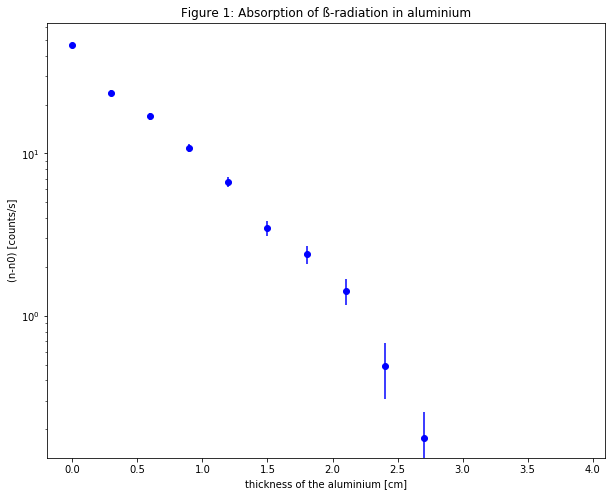

In [29]:
ground=np.mean([116,104])/300
dground=ground*np.sqrt((1/np.sqrt(116))**2+(1/np.sqrt(104))**2)/300
thical=np.array([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3.0,3.3,3.6,3.9])
timeß=np.array([30,30,30,30,30,30,30,30,30,120,120,120,120,120])
countß=np.array([1420,723,524,339,217,120,88,59,31,86,59,54,59,62])
n0ß=0.54
dn0ß=np.sqrt(162)/300
nß=countß/timeß-n0ß
dnß=np.sqrt(countß)/timeß
plt.figure(1,figsize=(10,8))
plt.errorbar(thical,nß,yerr=dnß, fmt='ob')
plt.title('Figure 1: Absorption of ß-radiation in aluminium')
plt.xlabel('thickness of the aluminium [cm]')
plt.ylabel('(n-n0) [counts/s]')
plt.yscale('log')
plt.savefig("Absorption_ß.pdf")

# Absorption of  ɣ-radiation

Attenuation coefficient: 0.615  0.013 1/cm
Material independent mass atten. coeff.: 0.0542  0.0012 cm^2/g


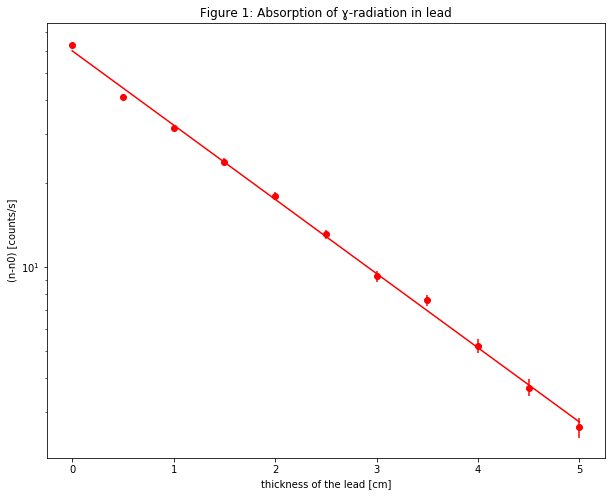

In [30]:
thicpb=np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
countsɣ=np.array([3809,2478,1926,1460,1107,808,577,477,334,243,181])
timeɣ=60
nɣ=countsɣ/timeɣ-ground
dnɣ=np.sqrt(countsɣ)/timeɣ
plt.figure(2,figsize=(10,8))
plt.errorbar(thicpb,nɣ,yerr=dnɣ, fmt='or')
plt.title('Figure 1: Absorption of ɣ-radiation in lead')
plt.xlabel('thickness of the lead [cm]')
plt.ylabel('(n-n0) [counts/s]')
plt.yscale('log')

poptɣ,pcovɣ=curve_fit(exponential, thicpb,nɣ, sigma=dnɣ)
plt.plot(thicpb,exponential(thicpb,*poptɣ), color="red")
mass_aten=poptɣ[1]/densityPb
dmass_aten=np.sqrt(pcovɣ[1][1])/densityPb
print("Attenuation coefficient: {:.3f}  {:.3f} 1/cm".format(poptɣ[1],np.sqrt(pcovɣ[1][1])))
print("Material independent mass atten. coeff.: {:.4f}  {:.4f} cm^2/g".format(mass_aten,dmass_aten))

# Activity of the ɣ-radiation

In [34]:
r=0.7
def activity(n,d):
    return(4*n*d**2)/(0.004*r**2)
def dactivity(n,d,dn,dd):
    return activity(n,d)*np.sqrt(2*(dd/d)**2+(dn/n)**2)

d=np.array([5,10,20])
dd=0.2
n=np.array([39505,11408,2926])/60
dn=np.sqrt(n)/60
#finalact=np.mean([activity(n,d)])
#dfinalact=np.sqrt((1/6)*(finalact-activity(n[0],d[0]))**2+(finalact-activity(n[1],d[1]))**2+(finalact-activity(n[2],d[2]))**2)
print(activity(n,d)/1e6)
print(dactivity(n,d,dn,dd)/1e6)

[33.59268707 38.80272109 39.80952381]
[1.90041461 1.09850837 0.57095248]


In [37]:
acorr=4*n*(d+l/2)**2/(0.004*r**2)
dacorr=acorr*sqrt((dn/n)**2 *2*(dd**2/))
aabg=acorr*np.exp(-0.14*mass_aten*7.9)
daabg=np.sqrt((dacorr*aabg/acorr)**2 + (dmass_aten*aabg*0.14*7.9)**2)

SyntaxError: invalid syntax (<ipython-input-37-ec27b1356a66>, line 2)

<ErrorbarContainer object of 3 artists>

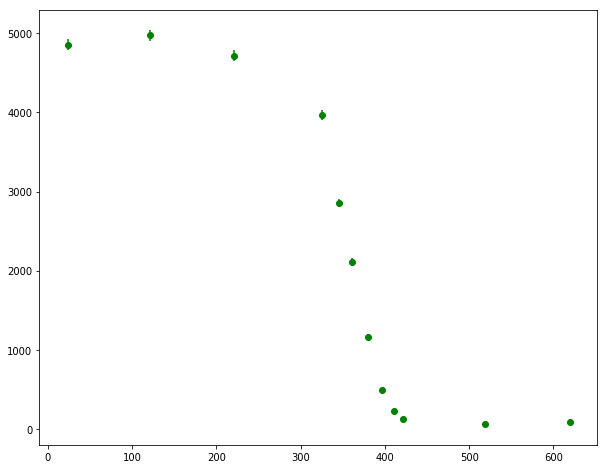

In [42]:
p0=1013
s0=3.95
ds0=0.05
areadenswindow=2.35/1000
pa=np.array([24,121,221,325,422,519,620,346,361,380,411,396])
dpa=np.array([4,2,2,2,2,2,2,2,2,2,2,2])
na=np.array([4858,4975,4719,3969,121,56,81,2856,2110,1165,221,488])
dna=np.sqrt(na)
plt.figure(3,figsize=(10,8))
plt.errorbar(pa,na,yerr=dna, xerr=dpa, fmt='go')